In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [27]:
#function to convert strings to dates :)
def string_to_datetime(string):
    try:
        result = datetime.strptime(string, "%Y-%m-%d")       
        return result
    except:
        return string

In [28]:
h100_subcharts = pd.read_csv('hot100_radio_streaming_sales_Kpop.csv', converters={'chart_date':string_to_datetime})

In [29]:
h100_subcharts.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'chart_date', 'artist',
       'song_title_x', 'Original URL', 'original_lyrics',
       'English Translation URL', 'translated_lyrics', 'peak_position',
       'chart_weeks', 'english_lyrics', 'english_count', 'total_count',
       'translated_sentiment', 'english_sentiment', 'valence', 'danceability',
       'main_artist', 'search_title', 'scaled_valence', 'chart_date_radio',
       'song_title_y', 'peak_position_radio', 'chart_weeks_radio',
       'chart_date_streaming', 'song_title_x.1', 'peak_position_streaming',
       'chart_weeks_streaming', 'chart_date_sales', 'song_title_y.1',
       'peak_position_sales', 'chart_weeks_sales', 'missing_lyrics',
       'spotify_id', 'missing_lyrics_post', 'english_unique', 'total_unique',
       'english_percentage'],
      dtype='object')

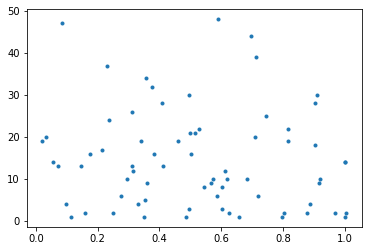

In [30]:
plt.plot(h100_subcharts['english_percentage'], h100_subcharts['peak_position_sales'], 'b.')
plt.plot(h100_subcharts['english_percentage'], h100_subcharts['peak_position'], 'r.')